In [ ]:
import pandas as pd
import numpy as np
import math

# Anggota Kelompok  :
#   Sopwan Musa Tajmala           (10121283)
#   Rifai Nugroho                     (10121295)
#   Alief Sidik Gunawan             (10121305)
#   Julfan Abdurahman                 (10121306)
#   Muhammad Debi Heriansyah    (10121308)
#   Bagus Aimar Atqansyah       (10121318)

waktuPemesanan = [46, 12, 37, 40, 46, 10, 23, 39, 41, 27, 51, 20, 12, 43, 41, 30, 14, 25, 57, 33, 12, 36, 18, 48, 32, 34, 36, 28, 53, 26, 39, 21, 53, 29, 52, 33, 18, 39, 59, 25, 38, 49, 34, 12, 47, 10, 25, 18, 22, 29, 44, 33, 59, 25, 30, 52, 45, 38, 37, 40, 64, 101, 97, 80, 114, 92, 70, 113, 74, 86, 75, 62, 62, 91, 79, 112, 98, 102, 64, 94]
waktuAntarKedatangan = [206, 68, 169, 183, 207, 63, 112, 178, 185, 131, 227, 101, 68, 193, 185, 143, 79, 123, 152, 71, 167, 95, 214, 150, 157, 167, 132, 232, 127, 176, 104, 235, 137, 229, 152, 94, 176, 121, 172, 217, 156, 71, 209, 61, 120, 94, 109, 137, 197, 153, 437, 469, 301, 320, 410, 380, 355, 351, 360, 256, 407, 389, 323, 456, 368, 280, 455, 297, 345, 301, 249, 248, 367, 317, 449, 395, 408, 258, 376, 476]
menu = [["Arabica Coffe Milk",120],["Caffe Latte",100],["Cappucino",80],["Caramel Coffee",240],["Grass Jelly Milk",60],["Lemon Squash",60],["Manggo Milk Tea",65],["Chicken Katsu",480],["Chicken Blackpepper Rice",500],["Beef Bulgogi",360]]

In [ ]:

def mengubahKebentukInterval (data,namaData):
  n = len(data)
  j = max(data)-min(data)
  k = 1+3.3*math.log(n,10)
  k = round(k)
  intervalKelas = round(j/k)
  no = []
  for i in range(1, k+1):
      no.append(i)
  kelas = []
  f = []
  xi = []
  for i in range(1, k+1):
      if i == 1:
          countF = 0
          a = min(data)
          b = a + (intervalKelas - 1)
          for j in data:
              if j >= a and j <= b:
                  countF += 1
      else:
          countF = 0
          a = min(data) + intervalKelas * (i-1)
          b = a + (intervalKelas - 1)
          for j in data:
              if j >= a and j <= b:
                  countF += 1
      xi.append((a+b)/2)
      kelas.append(str(a) + "-" + str(b))
      f.append(countF)
  xifi = [x * y for x, y in zip(xi, f)]
  xixbar = []
  miu = sum(xifi)/len(data)
  for i in range(0,len(xi)):
    xixbar.append(((xi[i]-miu)**2)*f[i] )
  standarDev = math.sqrt(sum(xixbar)*(1/(n-1)))
  miuStatdev =[miu,standarDev]
  dataFrame = {
      'No': no,
      'Lama '+namaData+' (detik)': kelas,
      'Frekuensi': f,
      '𝑥𝑖':xi,
      '𝑥𝑖*𝑓𝑖': xifi,
      '𝑓𝑖*(𝑥𝑖-x\u0304)\u00B2':xixbar
  }
  df = pd.DataFrame(dataFrame)
  df.loc[k] = ['', 'Total', len(data),'','',sum(xixbar)]
  from IPython.display import display, HTML
  # display(HTML(df.to_html(index=False)))
  return df,miuStatdev



In [ ]:
dfWaktuPesan,miu_statDevWaktuPesan = mengubahKebentukInterval(waktuPemesanan,'Pemesanan')
display(dfWaktuPesan)
print('μ = ',miu_statDevWaktuPesan[0])
print('σ = ',miu_statDevWaktuPesan[1])

,No,Lama Pemesanan (detik),Frekuensi,𝑥𝑖,𝑥𝑖*𝑓𝑖,𝑓𝑖*(𝑥𝑖-x̄)²
0,1,10-24,14,17.0,238.0,12757.992188
1,2,25-39,26,32.0,832.0,5997.164062
2,3,40-54,17,47.0,799.0,0.597656
3,4,55-69,7,62.0,434.0,1535.871094
4,5,70-84,5,77.0,385.0,4443.925781
5,6,85-99,6,92.0,552.0,12048.960938
6,7,100-114,5,107.0,535.0,17887.675781
7,,Total,80,,,54672.187500


μ =  47.1875
σ =  26.306900355783345


In [ ]:
dfWaktuAntarKedatangan,miu_statDevAntarKedatangan = mengubahKebentukInterval(waktuAntarKedatangan,'Antar Kedatangan')
display(dfWaktuAntarKedatangan)
print('μ = ',miu_statDevAntarKedatangan[0])
print('σ = ',miu_statDevAntarKedatangan[1])

,No,Lama Antar Kedatangan (detik),Frekuensi,𝑥𝑖,𝑥𝑖*𝑓𝑖,𝑓𝑖*(𝑥𝑖-x̄)²
0,1,61-119,14,90.0,1260.0,245277.639688
1,2,120-178,22,149.0,3278.0,118405.240938
2,3,179-237,14,208.0,2912.0,2887.939688
3,4,238-296,5,267.0,1335.0,9962.532031
4,5,297-355,9,326.0,2934.0,96666.582656
5,6,356-414,10,385.0,3850.0,264509.564062
6,7,415-473,5,444.0,2220.0,245615.907031
7,,Total,80,,,983325.406094


μ =  222.3625
σ =  111.56682768261089


In [ ]:
def pembangkitBilanganAcak(miu,statDev):
  def lcg(seed, a, c, m, jumlahIndeks):
      result = []
      x = seed

      for i in range(jumlahIndeks):
          x = (a * x + c) % m
          result.append((i + 1, x, x / m))

      return result

  seed = 11040415
  a = 13
  c = 79
  m = 15837
  jumlahIndeks = 25
  LCG = lcg(seed, a, c, m, jumlahIndeks)

  # Create DataFrame
  data = {
      'i': [],
      # 'Zi-1': [],
      'Zi': [],
      'Ui': [],
      'Z': [],
      'Hasil': []
  }

  previous_z = 0
  for i, z, ui in LCG:
      data['i'].append(i)
      # data['Zi-1'].append(previous_z)
      data['Zi'].append(z)
      data['Ui'].append('{:.4f}'.format(ui))
      z_value = np.sqrt(-2 * np.log(ui)) * np.cos(2 * np.pi * LCG[i][2] if i < 9 else LCG[i-1][2])
      data['Z'].append('{:.10f}'.format(z_value))  #
      miu = miu
      sigma = statDev
      x_value = miu + (sigma * z_value)
      data['Hasil'].append(round(x_value))
      previous_z = z

  df = pd.DataFrame(data)
  df.replace('-', 0, inplace=True)

  # Display the table
  from IPython.display import display, HTML
  # display(HTML(df.to_html(index=False)))
  return df

In [ ]:
pembangkitBilanganAcak(miu_statDevWaktuPesan[0],miu_statDevWaktuPesan[1])


,i,Zi,Ui,Z,Hasil
0,1,10580,0.6681,-0.3321506495,38
1,2,10923,0.6897,0.8479434943,69
2,3,15382,0.9713,-0.1636277593,43
3,4,10001,0.6315,0.2124823188,53
4,5,3396,0.2144,0.4645199557,59
5,6,12553,0.7926,-0.2480806074,41
6,7,4898,0.3093,1.5122723170,87
7,8,405,0.0256,-1.4139414128,10
8,9,5344,0.3374,1.3908987548,84
9,10,6203,0.3917,1.2654844446,80


In [ ]:
pembangkitBilanganAcak(miu_statDevAntarKedatangan[0],miu_statDevAntarKedatangan[1])

,i,Zi,Ui,Z,Hasil
0,1,10580,0.6681,-0.3321506495,185
1,2,10923,0.6897,0.8479434943,317
2,3,15382,0.9713,-0.1636277593,204
3,4,10001,0.6315,0.2124823188,246
4,5,3396,0.2144,0.4645199557,274
5,6,12553,0.7926,-0.2480806074,195
6,7,4898,0.3093,1.5122723170,391
7,8,405,0.0256,-1.4139414128,65
8,9,5344,0.3374,1.3908987548,378
9,10,6203,0.3917,1.2654844446,364


In [ ]:
def pembangkitBilanganAcakMenu(menu,seed,a,m):
  def mrng(seed, a, m, jumlahIndeks):
      result = []
      x = seed

      for i in range(jumlahIndeks):
          x = (a * x ) % m
          result.append((i + 1, x / m,round((x/m)*10)))

      return result

  jumlahIndeks = 25
  LCG = mrng(seed, a, m, jumlahIndeks)

  # Create DataFrame
  data = {
      'i': [],
      'Ui': [],
      'Bilangan Acak': [],
      'Hasil': [],
      'Waktu': [],

  }

  previous_z = 0
  for i, ui, z in LCG:
      data['i'].append(i)
      data['Ui'].append(ui)
      data['Bilangan Acak'].append(z)
      data['Hasil'].append(menu[z-1][0])
      data['Waktu'].append(menu[z-1][1])


  df = pd.DataFrame(data)
  df.replace('-', 0, inplace=True)

  # Display the table
  from IPython.display import display, HTML
  # display(HTML(df.to_html(index=False)))
  return df

In [ ]:
seed = 11040415
a = 13
m = 15837
menu1 = pembangkitBilanganAcakMenu(menu,seed,a,m)
display(menu1)

,i,Ui,Bilangan Acak,Hasil,Waktu
0,1,0.663068,7,Manggo Milk Tea,65
1,2,0.619878,6,Lemon Squash,60
2,3,0.058408,1,Arabica Coffe Milk,120
3,4,0.759298,8,Chicken Katsu,480
4,5,0.870872,9,Chicken Blackpepper Rice,500
5,6,0.321336,3,Cappucino,80
6,7,0.177369,2,Caffe Latte,100
7,8,0.305803,3,Cappucino,80
8,9,0.975437,10,Beef Bulgogi,360
9,10,0.680684,7,Manggo Milk Tea,65


In [ ]:
seed = 11040415
a = 13
m = 1583
menu2 = pembangkitBilanganAcakMenu(menu,seed,a,m)
display(menu2)

,i,Ui,Bilangan Acak,Hasil,Waktu
0,1,0.705622,7,Manggo Milk Tea,65
1,2,0.173089,2,Caffe Latte,100
2,3,0.250158,3,Cappucino,80
3,4,0.252053,3,Cappucino,80
4,5,0.276690,3,Cappucino,80
5,6,0.596968,6,Lemon Squash,60
6,7,0.760581,8,Chicken Katsu,480
7,8,0.887555,9,Chicken Blackpepper Rice,500
8,9,0.538219,5,Grass Jelly Milk,60
9,10,0.996841,10,Beef Bulgogi,360


In [ ]:
seed = 11040425
a = 13
m = 1583
menu3 = pembangkitBilanganAcakMenu(menu,seed,a,m)
display(menu3)

,i,Ui,Bilangan Acak,Hasil,Waktu
0,1,0.787745,8,Chicken Katsu,480
1,2,0.240682,2,Caffe Latte,100
2,3,0.128869,1,Arabica Coffe Milk,120
3,4,0.675300,7,Manggo Milk Tea,65
4,5,0.778901,8,Chicken Katsu,480
5,6,0.125711,1,Arabica Coffe Milk,120
6,7,0.634239,6,Lemon Squash,60
7,8,0.245104,2,Caffe Latte,100
8,9,0.186355,2,Caffe Latte,100
9,10,0.422615,4,Caramel Coffee,240


In [ ]:
randomNumber = []
a = 3
mod = 10
seed = 7

for i in range(25):
    z = (seed * a) % mod
    seed = z
    num = round((z / mod) *10)
    if num > 3:
      num =num % 3 + 1
    randomNumber.append((num))

print(randomNumber)

[1, 3, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1]


In [ ]:

def lcg(seed, a, c, m, jumlahIndeks):
    result = []
    x = seed

    for i in range(jumlahIndeks):
        x = (a * x + c) % m
        result.append((i + 1, x, x / m))

    return result

seed = 11040415
a = 13
c = 79
m = 15837
jumlahIndeks = 25
LCG = lcg(seed, a, c, m, jumlahIndeks)

# Create DataFrame
data = {
    'No':[],
    'Antar Kedatangan Pelanggan (Detik)':[],
    'Kumulatif kedatangan pelanggan (detik)':[],
    'Lama Pemesanan': [],
    'Banyaknya Menu yang dipesan':[],
    'Menu 1':[],
    'Menu 2':[],
    'Menu 3':[],
    'Total Pembuatan Menu':[],
    'Total Waktu Pelayanan':[],
    'Pembuat Makanan':[],
    'Waktu Menunggu Pelanggan':[],
    'Waktu Menunggu Pelayan':[],
}
previousXvalue = 0
previous_z = 0
p = [1,2,3,4]
pelayan = 1
kumulatifKedatangan = 0
for i,z, ui in LCG:

    pembuatanMenu = menu1.iloc[i-1,4] if randomNumber[i-1] == 1 else (menu1.iloc[i-1,4]+menu2.iloc[i-1,4] if randomNumber[i-1]==2 else menu1.iloc[i-1,4]+menu2.iloc[i-1,4]+menu3.iloc[i-1,4])
    z_value = np.sqrt(-2 * np.log(ui)) * np.cos(2 * np.pi * LCG[i][2] if i < 9 else LCG[i-1][2])
    x_valuePelanggan = miu_statDevAntarKedatangan[0] + (miu_statDevAntarKedatangan[1] * z_value)
    kumulatifKedatangan = round(x_valuePelanggan+kumulatifKedatangan)
    x_valuePesanan = miu_statDevWaktuPesan[0] + (miu_statDevWaktuPesan[1] * z_value)
    lamaPemesanan = round(x_valuePesanan)
    data['No'].append(i)
    data['Antar Kedatangan Pelanggan (Detik)'].append(round(x_valuePelanggan))
    data['Lama Pemesanan'].append(lamaPemesanan)
    data['Kumulatif kedatangan pelanggan (detik)'].append(kumulatifKedatangan)
    data['Banyaknya Menu yang dipesan'].append(randomNumber[i-1])
    data['Menu 1'].append(menu1.iloc[i-1,3])
    data['Menu 2'].append(menu2.iloc[i-1,3] if randomNumber[i-1]  >=2 else '--')
    data['Menu 3'].append(menu3.iloc[i-1,3] if randomNumber[i-1] == 3 else "--")
    data['Total Pembuatan Menu'].append(pembuatanMenu)
    data['Total Waktu Pelayanan'].append(pembuatanMenu+kumulatifKedatangan+lamaPemesanan)
    data['Waktu Menunggu Pelanggan'].append( 0 if i <= 4 else ('0' if min(p) < pembuatanMenu else abs(pembuatanMenu-pembuatanMenu-min(p))) )
    data['Waktu Menunggu Pelayan'].append(0 if i <= 4 else (pembuatanMenu-min(p) if min(p) < pembuatanMenu else 0))

    if min(p[0],p[1],p[2],p[3])==p[0]:
      p[0] = pembuatanMenu+kumulatifKedatangan+lamaPemesanan
      pelayan = 1
    elif min(p[0],p[1],p[2],p[3])==p[1]:
      p[1] = pembuatanMenu+kumulatifKedatangan+lamaPemesanan
      pelayan = 2
    elif min(p[0],p[1],p[2],p[3])==p[2]:
      p[2] = pembuatanMenu+kumulatifKedatangan+lamaPemesanan
      pelayan = 3
    elif min(p[0],p[1],p[2],p[3])==p[3]:
      p[3] = pembuatanMenu+kumulatifKedatangan+lamaPemesanan
      pelayan = 4

    data['Pembuat Makanan'].append(pelayan)
    previous_z = z
    previousXvalue = x_valuePelanggan
df = pd.DataFrame(data)
df.replace('-', 0, inplace=True)

# Display the table
from IPython.display import display, HTML
display(HTML(df.to_html(index=False)))

No,Antar Kedatangan Pelanggan (Detik),Kumulatif kedatangan pelanggan (detik),Lama Pemesanan,Banyaknya Menu yang dipesan,Menu 1,Menu 2,Menu 3,Total Pembuatan Menu,Total Waktu Pelayanan,Pembuat Makanan,Waktu Menunggu Pelanggan,Waktu Menunggu Pelayan
1,185,185,38,1,Manggo Milk Tea,--,--,65,288,1,0,0
2,317,502,69,3,Lemon Squash,Caffe Latte,Caffe Latte,260,831,2,0,0
3,204,706,43,1,Arabica Coffe Milk,--,--,120,869,3,0,0
4,246,952,53,2,Chicken Katsu,Cappucino,--,560,1565,4,0,0
5,274,1226,59,1,Chicken Blackpepper Rice,--,--,500,1785,1,0,212
6,195,1421,41,3,Cappucino,Lemon Squash,Arabica Coffe Milk,260,1722,2,831,0
7,391,1812,87,1,Caffe Latte,--,--,100,1999,3,869,0
8,65,1877,10,2,Cappucino,Chicken Blackpepper Rice,--,580,2467,4,1565,0
9,378,2255,84,1,Beef Bulgogi,--,--,360,2699,2,1722,0
10,364,2619,80,3,Manggo Milk Tea,Beef Bulgogi,Caramel Coffee,665,3364,1,1785,0


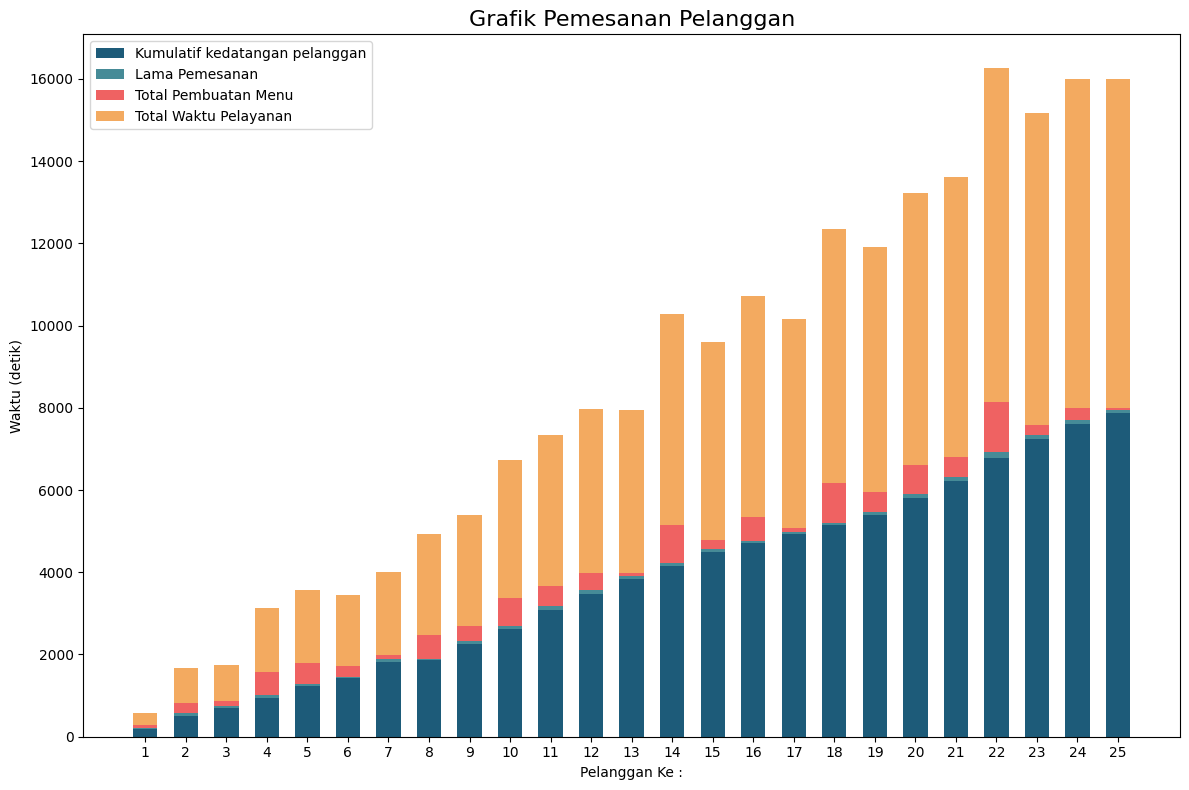

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
bar_width = 0.6
index = df['No']

plt.bar(index, df['Kumulatif kedatangan pelanggan (detik)'], width=bar_width, label='Kumulatif kedatangan pelanggan', color='#1D5B79')
plt.bar(index, df['Lama Pemesanan'], bottom=df['Kumulatif kedatangan pelanggan (detik)'], width=bar_width, label='Lama Pemesanan', color='#468B97')
plt.bar(index, df['Total Pembuatan Menu'], bottom=df['Lama Pemesanan']+df['Kumulatif kedatangan pelanggan (detik)'], width=bar_width, label='Total Pembuatan Menu', color='#EF6262')
plt.bar(index, df['Total Waktu Pelayanan'], bottom=df['Total Pembuatan Menu']+df['Lama Pemesanan']+df['Kumulatif kedatangan pelanggan (detik)'], width=bar_width, label='Total Waktu Pelayanan', color='#F3AA60')

plt.title('Grafik Pemesanan Pelanggan', fontsize=16)
plt.xlabel('Pelanggan Ke :')
plt.ylabel('Waktu (detik)')
plt.legend()

plt.xticks(index, df['No'])
plt.yticks()
plt.tight_layout()
plt.show()